# h3 hexagons introduction  
H3 is a geospatial indexing system by Uber that partitions the globe into hexagonal grids for more uniform and efficient spatial analysis. It offers multiple resolution levels, facilitating applications from ride-sharing logistics to data visualization by providing a consistent framework for managing and analyzing location data.

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os
import ellipsis as el
import h3pandas
import openpyxl
from shapely.wkb import loads

import sys
# Append the directory containing your module to the Python path
sys.path.append('/mnt/data/charging-point-localization/src/')

# Now you can import your module
from visualization import cal_hexagons
# Use functions or classes from cal_hexagons

# The back map of Taiwan - Village level

In [3]:
gdf = cal_hexagons.gdf_read_file("SpatialData/TaiwanVillageMap/G97_TW_U01VI_2021M10.shp")
gdf.head()

,COUNTY,TOWN,VILLAGE,COUNTY_ID,TOWN_ID,V_ID,VILLAGE_ID,geometry
0,高雄市,林園區,中門里,64000,64000130,64000130-006,006,"POLYGON ((185729.982 2489774.273, 185722.932 2..."
1,高雄市,林園區,港埔里,64000,64000130,64000130-008,008,"POLYGON ((186890.686 2489068.786, 186880.556 2..."
2,高雄市,旗津區,上竹里,64000,64000100,64000100-010,010,"POLYGON ((177841.136 2497639.008, 177839.509 2..."
3,高雄市,旗津區,中興里,64000,64000100,64000100-013,013,"POLYGON ((177633.093 2497484.489, 177633.134 2..."
4,屏東縣,潮州鎮,新榮里,10013,10013020,10013020-003,003,"POLYGON ((202693.486 2494473.428, 202707.377 2..."


# The back map of Taiwan - Town level

In [4]:
tmap = cal_hexagons.gdf_read_file("SpatialData//TaiwanTownMap/town_map.shp")
tmap.head()

,TOWN_ID,COUNTY,TOWN,COUNTY_ID,geometry
0,09007010,連江縣,南竿鄉,09007,"MULTIPOLYGON (((145749.325 2885946.923, 145748..."
1,09007020,連江縣,北竿鄉,09007,"MULTIPOLYGON (((148122.738 2897629.965, 148113..."
2,09007030,連江縣,莒光鄉,09007,"MULTIPOLYGON (((143663.566 2873970.901, 143647..."
3,09007040,連江縣,東引鄉,09007,"MULTIPOLYGON (((190344.394 2894296.785, 190345..."
4,09020010,金門縣,金城鎮,09020,"MULTIPOLYGON (((-20799.283 2700750.466, -20804..."


# Delete the offshore island areas of Taiwan

In [5]:
# Delete the offshore island areas -- Village
noisland_v = cal_hexagons.del_outlying_islands(gdf)
# Convert coordinates system -- Village
noisland_v = cal_hexagons.crs_to_4326(noisland_v)

# Delete the offshore island areas -- Town
noisland_t = cal_hexagons.del_outlying_islands(tmap)
# Convert coordinates system -- Town
noisland_t = cal_hexagons.crs_to_4326(noisland_t)

original coordinate system： EPSG:3826
new coordinate system： epsg:4326
original coordinate system： EPSG:3826
new coordinate system： epsg:4326


# population(The finest granularity is village)  
COLUMN2 = Population count

In [6]:
pop_data = cal_hexagons.df_read_file("CountyinfoData/Village/110_socialeconomics.csv")
pop_data

,COUNTY_ID,COUNTY,TOWN_ID,TOWN,V_ID,VILLAGE,COLUMN1,COLUMN2,COLUMN3,COLUMN4,...,COLUMN153,COLUMN154,COLUMN155,COLUMN156,COLUMN157,COLUMN158,COLUMN159,COLUMN160,COLUMN161,INFO_TIME
0,縣市代碼,縣市名稱,鄉鎮市區代碼,鄉鎮市區名稱,村里代碼,村里名稱,戶數,人口數,男性人口數,女性人口數,...,各類所得金額財產交易所得(108年起),各類所得金額機會中獎所得(108年起),各類所得金額股利所得(108年起),各類所得金額退職所得(108年起),各類所得金額其他所得(108年起),各類所得金額稿費所得(108年起),各類所得金額申報大於歸戶(108年起),薪資收入(108年起),稿費收入(108年起),資料時間
1,65000,新北市,65000010,板橋區,65000010-001,留侯里,689,1659,790,869,...,-,-,-,-,-,-,-,-,-,110Y
2,65000,新北市,65000010,板橋區,65000010-002,流芳里,632,1478,681,797,...,-,-,-,-,-,-,-,-,-,110Y
3,65000,新北市,65000010,板橋區,65000010-003,赤松里,481,1036,490,546,...,-,-,-,-,-,-,-,-,-,110Y
4,65000,新北市,65000010,板橋區,65000010-004,黃石里,529,1294,620,674,...,-,-,-,-,-,-,-,-,-,110Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7730,09007,連江縣,09007030,莒光鄉,09007030-003,西坵村,24,105,73,32,...,-,-,-,-,-,-,-,-,-,110Y
7731,09007,連江縣,09007030,莒光鄉,09007030-004,福正村,51,237,144,93,...,-,-,-,-,-,-,-,-,-,110Y
7732,09007,連江縣,09007030,莒光鄉,09007030-005,大坪村,125,517,315,202,...,-,-,-,-,-,-,-,-,-,110Y
7733,09007,連江縣,09007040,東引鄉,09007040-001,中柳村,168,665,374,291,...,-,-,-,-,-,-,-,-,-,110Y


In [7]:
pop_data = cal_hexagons.df_read_file("CountyinfoData/Village/110_socialeconomics.csv")
pop_data = pop_data.drop(0)
pop_data = pop_data[["V_ID", "COLUMN2"]]

# Convert object type to int
pop_data['COLUMN2'] = [int(i) for i in pop_data['COLUMN2']]
pop_data.rename(columns = {'COLUMN2':'count'}, inplace = True)

# Create the geometry of Taiwan's population
population = pd.merge(noisland_v, pop_data, on='V_ID', how='inner')
population = population[["geometry", "count"]]

In [8]:
population

,geometry,count
0,"POLYGON ((120.37531 22.50652, 120.37524 22.506...",2808
1,"POLYGON ((120.38662 22.50019, 120.38652 22.500...",2038
2,"POLYGON ((120.29827 22.57723, 120.29826 22.577...",3118
3,"POLYGON ((120.29626 22.57582, 120.29626 22.575...",2810
4,"POLYGON ((120.54004 22.54951, 120.54018 22.549...",1380
...,...,...
7559,"POLYGON ((121.11993 22.80546, 121.12212 22.804...",3184
7560,"POLYGON ((121.12680 22.72076, 121.12656 22.720...",2647
7561,"POLYGON ((121.60841 24.02500, 121.60846 24.024...",3570
7562,"POLYGON ((121.59990 24.04409, 121.60025 24.043...",1615


In [9]:
population['count'].sum()

23092331

# income(The finest granularity is town)

Income derived from job positions or work, including salary, emoluments, wages, allowances, annuities, bonuses, dividends, various subsidies, and other payments (such as transportation expenses).
※ The unit is in thousands of dollars. The data for the village(COLUMN160) refers to the total salary income declared by all households in that village for the year 110, not an average.

In [28]:
inc_data = cal_hexagons.df_read_file("CountyinfoData/Village/109_socialeconomics.csv")
inc_data.head()

,COUNTY_ID,COUNTY,TOWN_ID,TOWN,V_ID,VILLAGE,COLUMN1,COLUMN2,COLUMN3,COLUMN4,...,COLUMN153,COLUMN154,COLUMN155,COLUMN156,COLUMN157,COLUMN158,COLUMN159,COLUMN160,COLUMN161,INFO_TIME
0,縣市代碼,縣市名稱,鄉鎮市區代碼,鄉鎮市區名稱,村里代碼,村里名稱,戶數,人口數,男性人口數,女性人口數,...,各類所得金額財產交易所得(108年起),各類所得金額機會中獎所得(108年起),各類所得金額股利所得(108年起),各類所得金額退職所得(108年起),各類所得金額其他所得(108年起),各類所得金額稿費所得(108年起),各類所得金額申報大於歸戶(108年起),薪資收入(108年起),稿費收入(108年起),資料時間
1,65000,新北市,65000010,板橋區,65000010-001,留侯里,694,1696,810,886,...,912,909,40861,13,4168,214,11684,320021,559,109Y
2,65000,新北市,65000010,板橋區,65000010-002,流芳里,635,1518,707,811,...,2731,776,65281,182,13240,325,21154,336721,1089,109Y
3,65000,新北市,65000010,板橋區,65000010-003,赤松里,456,996,459,537,...,2021,934,64371,0,2478,0,11800,271148,501,109Y
4,65000,新北市,65000010,板橋區,65000010-004,黃石里,523,1281,615,666,...,1601,800,49101,0,8837,248,5478,319406,962,109Y


In [11]:
inc_data = inc_data.drop(0)

In [13]:
# Due to a missing value in one of the village, the average data of the town is used to fill in this missing value
#df[df['Income'].isna()]
interpo = inc_data[inc_data['TOWN']== '後壁區']
interpo_d = interpo["COLUMN160"].dropna(axis = 0)
interpo_d = [int(i) for i in interpo_d]
missing_mean = round(sum(interpo_d)/ len(interpo_d), 0)
inc_data["COLUMN160"][inc_data["COLUMN160"].isna()] = missing_mean

# delete unnecessary columns
income_data = inc_data[["TOWN_ID", "COLUMN160", "COLUMN1"]]

#Using town as the smallest granularity(thus, merge the village data)
income_data["COLUMN160"] = [int(i) for i in income_data['COLUMN160']]
income_data["COLUMN1"] = [int(i) for i in inc_data["COLUMN1"]]

# calculate average family income of TOWN
sum_income = income_data.groupby('TOWN_ID')['COLUMN160'].sum().reset_index()
sum_family = income_data.groupby('TOWN_ID')['COLUMN1'].sum().reset_index()
income_cal = pd.merge(sum_income, sum_family, on='TOWN_ID', how='inner')
income_cal['count'] = income_cal["COLUMN160"] / income_cal["COLUMN1"]

#Taiwan income merged geometry
income = pd.merge(noisland_t, income_cal, on='TOWN_ID', how='inner')
income = income[["geometry", "count"]]


In [14]:
# validate
print(sum(income_cal['count'] * income_cal['COLUMN1']))
print(sum(income_data['COLUMN160']))

4989785247.0
4989785247


In [15]:
income.head()

,geometry,count
0,"POLYGON ((121.75045 24.72219, 121.75031 24.722...",494.646516
1,"POLYGON ((121.76635 24.66857, 121.76632 24.668...",473.027975
2,"POLYGON ((121.84064 24.47477, 121.83988 24.474...",393.125399
3,"MULTIPOLYGON (((121.82735 24.84094, 121.82737 ...",339.295041
4,"POLYGON ((121.76151 24.78263, 121.76120 24.782...",378.428869


# Create the geometry of H3 on the map of Taiwan

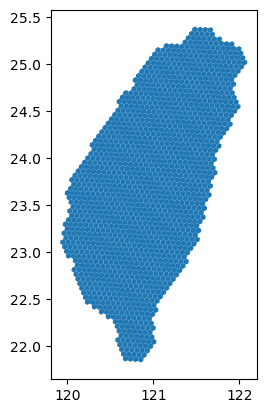

In [27]:
resolution = 6
distance = 2
hex_boundary = cal_hexagons.produce_tw_hexagons(noisland_v, resolution, distance)

# Calculate the population and income within each hexagon

In [18]:
pop_draw = cal_hexagons.cal_hex(population, hex_boundary)
income_draw = cal_hexagons.cal_hex(income, hex_boundary)

In [19]:
print(sum(pop_draw['count']))
print(sum(income_draw['count']))

23091105.0
149823.0


# charging station(The finest granularity is village)

In [38]:
ori_station = pd.read_csv('ChargingStation/Charge_station_0105.csv', low_memory=False)
ori_station[["id", 'address', 'geom']]

,id,address,geom
0,700,946 屏東縣恆春鎮大光路79-95號,0101000020E6100000560F98874C2F5E4007600322C4ED...
1,702,屏東縣恆春鎮下泉路47-8號,0101000020E6100000DFDFA0BDFA2E5E40B41CE8A1B6ED...
2,642,946 屏東縣恆春鎮船帆路580號,0101000020E6100000A5A487A1D5345E40B267CF656AEE...
3,1362,屏東縣恆春鎮埔頂路525號,0101000020E6100000D65240DAFF355E40DBE044F46BEB...
4,1129,946屏東縣恆春鎮鵝鑾路230號,0101000020E61000002A5437177F365E40E59997C3EEE7...
...,...,...,...
1715,1093,20744 新北市萬里區野柳里港東路167-1號,0101000020E610000083F755B9506C5E40C68A1A4CC334...
1716,369,207台灣新北市萬里區翡翠路17號,0101000020E61000001442075DC26B5E400801F9122A30...
1717,370,252台灣新北市三芝區中正路二段48之1號,0101000020E6100000C72E51BD35605E40AE9B525E2B41...
1718,632,253 新北市石門區草里里草埔尾5號,0101000020E610000029ECA2E881665E40DAE21A9FC946...


In [18]:
## charging_station dataset preprocess

charging_station = ori_station[["id", 'geom']]

# Convert WKB to WKT
charging_station['geometry'] = charging_station['geom'].apply(lambda x: loads(x).wkt)

# DataFrame has a 'geometry' column with string representations of points
charging_station['geometry'] = charging_station['geometry'].apply(cal_hexagons.convert_to_point)

gdf_cs = gpd.GeoDataFrame(charging_station, geometry='geometry')
gdf_cs = gdf_cs[["id", "geometry"]]

In [19]:
charging_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1720 entries, 0 to 1719
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        1720 non-null   int64 
 1   geom      1720 non-null   object
 2   geometry  1720 non-null   object
dtypes: int64(1), object(2)
memory usage: 40.4+ KB


In [20]:
gdf_cs

,id,geometry
0,700,POINT (120.73905 21.92877)
1,702,POINT (120.73405 21.92857)
2,642,POINT (120.82554 21.93131)
3,1362,POINT (120.84374 21.91962)
4,1129,POINT (120.85151 21.90599)
...,...,...
1715,1093,POINT (121.69243 25.20611)
1716,369,POINT (121.68374 25.18814)
1717,370,POINT (121.50328 25.25457)
1718,632,POINT (121.60168 25.27651)


In [28]:
# Calculate the number of points within each hexagon
cs, id= cal_hexagons.cal_hex_point(gdf_cs, hex_boundary)
sum(cs["count"])

1715

In [30]:
explore = cs["count"].aggregate(['min', 'max', 'mean', 'median'])
explore

min        0.000000
max       85.000000
mean       1.166667
median     0.000000
Name: count, dtype: float64

In [42]:
## why some charging stations are not be included by hexagons? Because they are not on mainland Taiwan.
## Verify whether the points not included in the hexagons are all located in the offshore islands Ans: Yes

# Flatten the list of Series into a single list of values
all_values = [value for series in id for value in series]
# Extract unique values
unique_values = set(all_values)
sort_station = sorted(ori_station["id"])
diff1 = set(sort_station) - set(unique_values)
ori_station[ori_station['id'].isin(diff1)][["id", "address", "geom"]]

,id,address,geom
852,1636,金門縣列嶼鄉雙口12號,0101000020E6100000EC3026FDBD8E5D4040683D7C9970...
1204,1496,金門縣民生路60號,0101000020E6100000B0CBF09F6E945D4053EC681CEA6F...
1358,1549,澎湖縣西衛里83-86號,0101000020E6100000A0A86C5853E55D405F4205871794...
1658,1621,金門縣金寧鄉伯玉路一段238號,0101000020E610000038656EBE11955D40C4245CC82370...
1719,1637,金門縣金湖鎮瓊安路37號,0101000020E610000098FA795391975D4005C078060D75...


In [43]:
## why some charging stations are not be included by hexagons? Because they are not on mainland Taiwan.
## Verify whether the points not included in the hexagons are all located in the offshore islands Ans: Yes

# Flatten the list of Series into a single list of values
all_values = [value for series in id for value in series]
# Extract unique values
unique_values = set(all_values)
sort_station = sorted(ori_station["id"])
diff1 = set(sort_station) - set(unique_values)
ori_station[ori_station['id'].isin(diff1)][["id", "address"]]
#These five address are not on mainland Taiwan.

,id,address
852,1636,金門縣列嶼鄉雙口12號
1204,1496,金門縣民生路60號
1358,1549,澎湖縣西衛里83-86號
1658,1621,金門縣金寧鄉伯玉路一段238號
1719,1637,金門縣金湖鎮瓊安路37號


# Upload and visualize maps on Ellipsis Drive

In [27]:
file_name = 'final_income'
cal_hexagons.draw_to_drive(income_draw, file_name)
file_name = 'final_population'
cal_hexagons.draw_to_drive(pop_draw, file_name)
file_name = 'final_charging_station'
cal_hexagons.draw_to_drive(cs, file_name)

no properties known for this timestamp adding them automatically
1470/1470 [====================================================================================================]